# Implement the PLA for classfication in the 2d space. Data set and classifier are randomly picked. 

## Author: Bojian Xu, bojianxu@ewu.edu

- In this implementation, we have ensured in the random number generaion phase: 
    - neither $w^*[1]$ nor $w^*[2]$ is zero.
    - no randomly generated sample is at $w^*$, i.e. ${w^*}^T x \neq 0$ for every sample $x$. 
- Important observation: 
    - The PLA can increase or decrease $w[0]$ by 1 per update, so if there is a big difference between $w^*[0]$ and the initial value of $w[0]$, the PLA is likely to take a long time before it halts. However, the theoretical bound $O((L/d)^2)$ step of course still holds, where $L = \max\{\lVert x\rVert\}$ and $d$ is the margine size.
    - This can solved by always have feature values within [0,1], because by doing so, the $x_0=1$ becomes relatively larger (or one can also say $x_0$ becomes fairly as important as other feathers), which makes the changes to $w[0]$ much faster. This is partially why nueral network requires all feature value to be [0,1] --- the so-called data normalization process!!!
   - Why the algorithm runs longer when $w^*$ is (nearly) purely vertical or horizontal? --> Not the case. The program takes time as usual. Question is solved. 
    

In [1]:
import numpy as np
from IPython.display import clear_output
from numpy.random import seed as seed
from numpy.random import rand as rand
import matplotlib.pyplot as plt
import math

In [2]:
seed()

In [12]:
n = 1000 #number of samples
delta = 0.01

In [4]:
def display_w_2D(w, color):
    xrange = np.arange(0.0, 1.0, delta)
    yrange = np.arange(0.0, 1.0, delta)
    x1, x2 = np.meshgrid(xrange,yrange)

    # F is one side of the equation, G is the other
    F = w[0] + w[1] * x1 + w[2] * x2

    plt.contour(x1, x2, (F), [0], colors = color)

In [5]:
# generate a w_star, d = 2
def w_star_gen():
    w_star = rand(3,1)
    while w_star[1,0] * w_star[2,0] == 0: # To ensure neither w1 nor w2 is zero to get an interesting w.
        w_star = rand(3,1)
    w_star[1,0] = w_star[1,0] * (-1)   # To ensure to have both +1 and -1 labels with good chance because all x1 >= 0 and x2 >= 0 
    w_star[0,0] = w_star[0,0] * min(abs(w_star[1,0]),abs(w_star[2,0])) # this is to ensure w_0/w_1 < 1 and w_0/w_2 < 1, so that the appropriate intercept can divide the data set into postive and negative samples
    #w_star[2,0] = 0
    
    return w_star

w_star: 
 [[ 0.02054563]
 [-0.93523308]
 [ 0.73215696]]


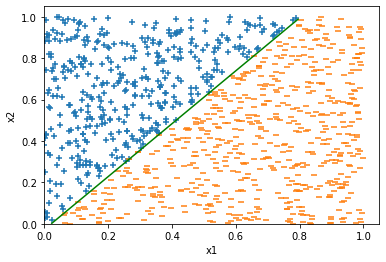

In [14]:
# n samples. Each sample includes: x0=1, x1, x2
x = rand(n,3) #* n
x[:,0] = 1

#The target weight vector the PLA is going to search for
w_star = w_star_gen()
print('w_star: \n', w_star)


#create the label array
y = np.sign(x @ w_star)
for i in range(n):
    if y[i] == 0:
        x[i,2] = x[i,2] + 0.1 # adjust the sample to make sure the sample is not on the w_star line.
        y[i] = np.sign(x[i] @ w_star)
        
        
# separate + and - samples for plotting     
pos = np.empty([1,3])
neg = np.empty([1,3])
for i in range(n):
    if y[i] == 1:
        pos = np.insert(pos, 0, x[i], 0)
    else: 
        neg = np.insert(neg, 0, x[i], 0)
# delete the init row which is on the bottom        
pos = np.delete(pos, -1, 0)
neg = np.delete(neg, -1, 0)


# display the data samples and the target classifier that PLA is tring to learn
plt.scatter(pos[:,1], pos[:,2], marker='+')
plt.scatter(neg[:,1], neg[:,2], marker='_')

display_w_2D(w_star, color = 'green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

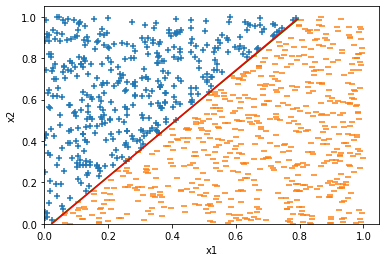

w: 
 [[  1.        ]
 [-41.74342068]
 [ 32.44326528]]


In [15]:
#The PLA to find the separating vector w
# This code is to demonstrate the 2-dimentional space case, but can be trivially modified to make it work for any d-dimentional space.
# This code can also be organized as a function: take matrix x and vector y, and return vector w. 

w = np.array([0,0,0]).reshape(-1,1)
print('w: \n', w)

updated = True
while updated:
    updated = False
    for i in range(n):
        if np.sign(x[i] @ w) != y[i]:
        #if (x[i] @ w <= 0 and y[i,0] == 1) or (x[i] @ w >= 0 and y[i,0] == -1):
            w = w + (y[i] * x[i]).reshape(-1,1)
            updated = True

            clear_output(wait=True)

            # display the data samples and the target/learned classifiers
            plt.scatter(pos[:,1], pos[:,2], marker='+')
            plt.scatter(neg[:,1], neg[:,2], marker='_')
            display_w_2D(w_star, color = 'green') #display the target classifier.
            display_w_2D(w, color = 'red') #display the learned classifier.
            plt.xlabel('x1')
            plt.ylabel('x2')
            plt.show()
            
            print('w: \n', w)



## Possible Work for students: 

- implement the pocket PLA for 2d samples for a straight line classifier in 2d space

- implement PLA for 3d samples that are linearly separatable and the classifier is a 3d plane, and have the data and classifier plotted. Implement the pocket version for 3d samples that are not linearly separable. 

- implement PLA for 2d samples but use z-space transformation, where the data set is separatable in the polynomial space of degree 2. Implement the pocket version


